# ***PROJECT***

***The primary purpose of this analysis is to identify and explain differences in the production data of the producer wells situated in the Volve field. The objective of this study is to provide helpful information to the petroleum management team, which can help them identify wells that are producing significant amounts of oil and gas while also highlighting which wells are showing signs of decreased productivity and may require attention to prevent further decline.***


---



# **Import Library and Dataset**

In [ ]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive

In [ ]:
# Import Dataset
drive.mount('/content/drive')

df_daily = pd.read_excel('/content/drive/MyDrive/RevoU IEP/Dataset/Daily Production Data.xlsx')
df_monthly = pd.read_excel('/content/drive/MyDrive/RevoU IEP/Dataset/Monthly Production Data.xlsx')

Mounted at /content/drive


# **Exploratory Data Analysis (EDA)**

### **Dataset Description**

---

In [ ]:
# Display 5 Initial Daily Production Dataset
df_daily.head(5)

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-07,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.00000,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,WI
1,2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2,2014-04-09,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
3,2014-04-10,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
4,2014-04-11,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.37614,...,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP


In [ ]:
# Display Daily Production Data Type & Non-null Values
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   15634 non-null  datetime64[ns]
 1   WELL_BORE_CODE            15634 non-null  object        
 2   NPD_WELL_BORE_CODE        15634 non-null  int64         
 3   NPD_WELL_BORE_NAME        15634 non-null  object        
 4   NPD_FIELD_CODE            15634 non-null  int64         
 5   NPD_FIELD_NAME            15634 non-null  object        
 6   NPD_FACILITY_CODE         15634 non-null  int64         
 7   NPD_FACILITY_NAME         15634 non-null  object        
 8   ON_STREAM_HRS             15349 non-null  float64       
 9   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64       
 10  AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64       
 11  AVG_DP_TUBING             8980 non-null   float64       
 12  AVG_ANNULUS_PRESS 

In [ ]:
# Shape Of The Daily Production Dataset
df_daily.shape

(15634, 24)

In [ ]:
# Column View Of The Daily Production Dataset
df_daily.columns

Index(['DATEPRD', 'WELL_BORE_CODE', 'NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME',
       'NPD_FIELD_CODE', 'NPD_FIELD_NAME', 'NPD_FACILITY_CODE',
       'NPD_FACILITY_NAME', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS',
       'AVG_CHOKE_SIZE_P', 'AVG_CHOKE_UOM', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'FLOW_KIND', 'WELL_TYPE'],
      dtype='object')

### **Data Cleaning**

---

##### **Copy Daily Production Data**

---

**Before cleaning the Daily Production dataset, first need to make a copy of the dataset.**

In [ ]:
# Copy Daily Production Dataset
Daily = df_daily.copy()

##### **Check The Value Daily Production Data**

---

In [ ]:
# Check The Value Wellbore
Daily['NPD_WELL_BORE_CODE'].value_counts()

5693    3327
5769    3306
5599    3056
5351    3056
7078    1165
7289     978
7405     746
Name: NPD_WELL_BORE_CODE, dtype: int64

***After analyzing the available data, it was discovered that four wells 5693, 5769, 5599, and 5351 - showed a significantly higher number.***

In [ ]:
# Check The Value Flow
Daily['FLOW_KIND'].value_counts()

production    9161
injection     6473
Name: FLOW_KIND, dtype: int64

***The dataset contains two main types of fluid flow: production and injection. This classification provides a clear understanding of the distinct fluid dynamics within the dataset, enabling a focused analysis of production and injection processes.***

In [ ]:
# Check The Value Type of The Well
Daily['WELL_TYPE'].value_counts()

OP    9143
WI    6491
Name: WELL_TYPE, dtype: int64

***The dataset shows that there are two main types of functional wells: those used for oil production and those used for water injection. This classification helps to distinguish the specific roles and operational objectives of each well in the dataset, providing a more precise perspective on the dynamics of oil production and water injection processes.***

##### **Drop The Columns Daily Production Data**

---

**Removing supplementary label columns to streamline data representation.**

In [ ]:
# Drop The Value Daily Production Data
Daily = Daily.drop(['WELL_BORE_CODE', 'NPD_WELL_BORE_NAME', 'NPD_FIELD_CODE', 'NPD_FIELD_NAME', 'NPD_FACILITY_CODE',
                    'NPD_FACILITY_NAME', 'AVG_CHOKE_UOM'], axis=1)
Daily

,DATEPRD,NPD_WELL_BORE_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-07,7405,0.0,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,WI
1,2014-04-08,7405,0.0,NaN,NaN,NaN,0.00000,1.003059,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2,2014-04-09,7405,0.0,NaN,NaN,NaN,0.00000,0.979008,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
3,2014-04-10,7405,0.0,NaN,NaN,NaN,0.00000,0.545759,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
4,2014-04-11,7405,0.0,310.37614,96.87589,277.27826,0.00000,1.215987,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15629,2016-09-14,5769,0.0,NaN,NaN,NaN,0.27272,0.636088,0.07776,0.22879,0.01862,0.0,0.0,0.0,NaN,production,OP
15630,2016-09-15,5769,0.0,NaN,NaN,NaN,0.28686,0.670794,0.08545,0.22914,0.00631,0.0,0.0,0.0,NaN,production,OP
15631,2016-09-16,5769,0.0,NaN,NaN,NaN,0.28604,0.664393,0.08544,0.22896,0.01181,0.0,0.0,0.0,NaN,production,OP
15632,2016-09-17,5769,0.0,NaN,NaN,NaN,0.27212,0.624660,0.07497,0.22846,0.02576,0.0,0.0,0.0,NaN,production,OP


***The decision to omit these columns is rooted in their indispensability for conducting a comprehensive analysis, as they lack substantive value in contributing to the analytical framework.***

##### **Handling Missing Values**

---

In [ ]:
# Number Of Blank Rows
Daily.isna().sum()

DATEPRD                        0
NPD_WELL_BORE_CODE             0
ON_STREAM_HRS                285
AVG_DOWNHOLE_PRESSURE       6654
AVG_DOWNHOLE_TEMPERATURE    6654
AVG_DP_TUBING               6654
AVG_ANNULUS_PRESS           7744
AVG_CHOKE_SIZE_P            6715
AVG_WHP_P                   6479
AVG_WHT_P                   6488
DP_CHOKE_SIZE                294
BORE_OIL_VOL                6473
BORE_GAS_VOL                6473
BORE_WAT_VOL                6473
BORE_WI_VOL                 9928
FLOW_KIND                      0
WELL_TYPE                      0
dtype: int64

In [ ]:
# Check Null Values For FLOW_KIND Is Production
Daily[Daily["FLOW_KIND"] == "production"].isnull().sum()

DATEPRD                        0
NPD_WELL_BORE_CODE             0
ON_STREAM_HRS                  0
AVG_DOWNHOLE_PRESSURE        181
AVG_DOWNHOLE_TEMPERATURE     181
AVG_DP_TUBING                181
AVG_ANNULUS_PRESS           1271
AVG_CHOKE_SIZE_P             242
AVG_WHP_P                      6
AVG_WHT_P                     15
DP_CHOKE_SIZE                  6
BORE_OIL_VOL                   0
BORE_GAS_VOL                   0
BORE_WAT_VOL                   0
BORE_WI_VOL                 9146
FLOW_KIND                      0
WELL_TYPE                      0
dtype: int64

In [ ]:
# Remove Consecutive Duplicates
def remove_consecutive_duplicates(input_string):
    return ''.join(x for x, y in zip(input_string, input_string[1:]) if x != y)

# Check Null Values In Each Unique NPD_WELL_BORE_CODE
def check_null_values(well):
    well_data = Daily[Daily["NPD_WELL_BORE_CODE"] == well]
    production_data = well_data[well_data["FLOW_KIND"] == "production"]
    print("The total number of null values in the well", well)
    print(production_data.isnull().sum())

# Print For Each Unique NPD_WELL_BORE_CODE
Well = Daily["NPD_WELL_BORE_CODE"].unique().tolist()
for i in Well:
    check_null_values(i)

The total number of null values in the well 7405
DATEPRD                       0
NPD_WELL_BORE_CODE            0
ON_STREAM_HRS                 0
AVG_DOWNHOLE_PRESSURE         3
AVG_DOWNHOLE_TEMPERATURE      3
AVG_DP_TUBING                 3
AVG_ANNULUS_PRESS           729
AVG_CHOKE_SIZE_P              0
AVG_WHP_P                     0
AVG_WHT_P                     0
DP_CHOKE_SIZE                 0
BORE_OIL_VOL                  0
BORE_GAS_VOL                  0
BORE_WAT_VOL                  0
BORE_WI_VOL                 746
FLOW_KIND                     0
WELL_TYPE                     0
dtype: int64
The total number of null values in the well 7078
DATEPRD                        0
NPD_WELL_BORE_CODE             0
ON_STREAM_HRS                  0
AVG_DOWNHOLE_PRESSURE          6
AVG_DOWNHOLE_TEMPERATURE       6
AVG_DP_TUBING                  6
AVG_ANNULUS_PRESS              6
AVG_CHOKE_SIZE_P               2
AVG_WHP_P                      6
AVG_WHT_P                      6
DP_CHOKE_SIZE  

In [ ]:
# Forward Fill The Missing Values In The Production Data
for well in Well:
    well_data = pd.DataFrame(Daily.loc[Daily["NPD_WELL_BORE_CODE"] == well])
    well_data = well_data[well_data["FLOW_KIND"] == "production"]
    well_data.fillna(method="ffill", inplace=True)
    Daily.update(well_data)

# Fill Remaining Missing Values With 0
Daily.fillna(0,inplace=True)

##### **Clean Daily Production Data**

---

In [ ]:
# Check Daily Production Dataset
Daily

,DATEPRD,NPD_WELL_BORE_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-07,7405.0,0.0,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,production,WI
1,2014-04-08,7405.0,0.0,0.00000,0.00000,0.00000,0.00000,1.003059,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,production,OP
2,2014-04-09,7405.0,0.0,0.00000,0.00000,0.00000,0.00000,0.979008,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,production,OP
3,2014-04-10,7405.0,0.0,0.00000,0.00000,0.00000,0.00000,0.545759,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,production,OP
4,2014-04-11,7405.0,0.0,310.37614,96.87589,277.27826,0.00000,1.215987,33.09788,10.47992,33.07195,0.0,0.0,0.0,0.0,production,OP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15629,2016-09-14,5769.0,0.0,0.00000,0.00000,0.00000,0.27272,0.636088,0.07776,0.22879,0.01862,0.0,0.0,0.0,0.0,production,OP
15630,2016-09-15,5769.0,0.0,0.00000,0.00000,0.00000,0.28686,0.670794,0.08545,0.22914,0.00631,0.0,0.0,0.0,0.0,production,OP
15631,2016-09-16,5769.0,0.0,0.00000,0.00000,0.00000,0.28604,0.664393,0.08544,0.22896,0.01181,0.0,0.0,0.0,0.0,production,OP
15632,2016-09-17,5769.0,0.0,0.00000,0.00000,0.00000,0.27212,0.624660,0.07497,0.22846,0.02576,0.0,0.0,0.0,0.0,production,OP


In [ ]:
# Create Clean Production Dataset
Daily_Production = Daily[Daily['WELL_TYPE'] == 'OP']
Daily_Production = Daily_Production.drop(labels=['FLOW_KIND', 'WELL_TYPE'], axis=1)
Production = Daily_Production[['DATEPRD', 'NPD_WELL_BORE_CODE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL']]
Production['NPD_WELL_BORE_CODE'] = Production['NPD_WELL_BORE_CODE'].astype('int')
Production

,DATEPRD,NPD_WELL_BORE_CODE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
1,2014-04-08,7405,0.0,0.0,0.0
2,2014-04-09,7405,0.0,0.0,0.0
3,2014-04-10,7405,0.0,0.0,0.0
4,2014-04-11,7405,0.0,0.0,0.0
5,2014-04-12,7405,0.0,0.0,0.0
...,...,...,...,...,...
15628,2016-09-13,5769,0.0,0.0,0.0
15629,2016-09-14,5769,0.0,0.0,0.0
15630,2016-09-15,5769,0.0,0.0,0.0
15631,2016-09-16,5769,0.0,0.0,0.0


### **Univariate Data Analysis**

---

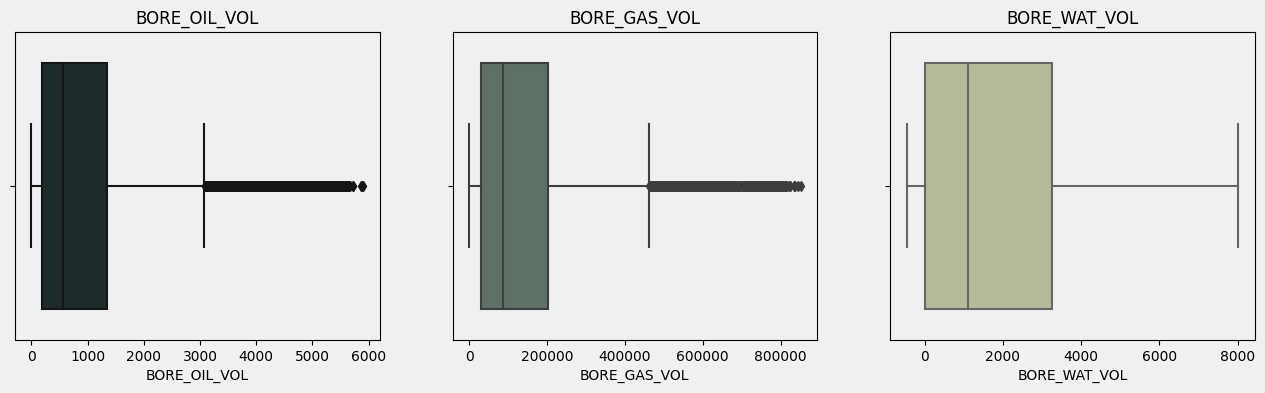

In [ ]:
# Create Figure And Axis
fig, axes = plt.subplots(1, 3, figsize=(16, 4), facecolor='#EFF0F2')

# Create Box-Plot For The Volume Of Oil Produced
sns.boxplot(x=Production['BORE_OIL_VOL'], color="#192D2C", ax=axes[0])
axes[0].set_title('BORE_OIL_VOL')
axes[0].set_facecolor('#EFF0F2')

# Create Box-Plot For The Volume Of Gas Produced
sns.boxplot(x=Production['BORE_GAS_VOL'], color="#5C7366", ax=axes[1])
axes[1].set_title('BORE_GAS_VOL')
axes[1].set_facecolor('#EFF0F2')

# Create Box-Plot For The Volume Of Water Produced
sns.boxplot(x=Production['BORE_WAT_VOL'], color="#BABF95", ax=axes[2])
axes[2].set_title('BORE_WAT_VOL')
axes[2].set_facecolor('#EFF0F2')

plt.show()

***The box plot reveals the presence of outliers in oil production exceeding approximately 3,000 units and gas production surpassing 460,000 units. Notably, there is an absence of outliers in water production. In the context of this analysis, it is imperative to retain outlier values, as their inclusion is crucial for discerning and understanding the underlying trends in production dynamics. Omitting outliers would compromise the integrity of the analysis by overlooking significant data points that may hold key insights into production trends.***

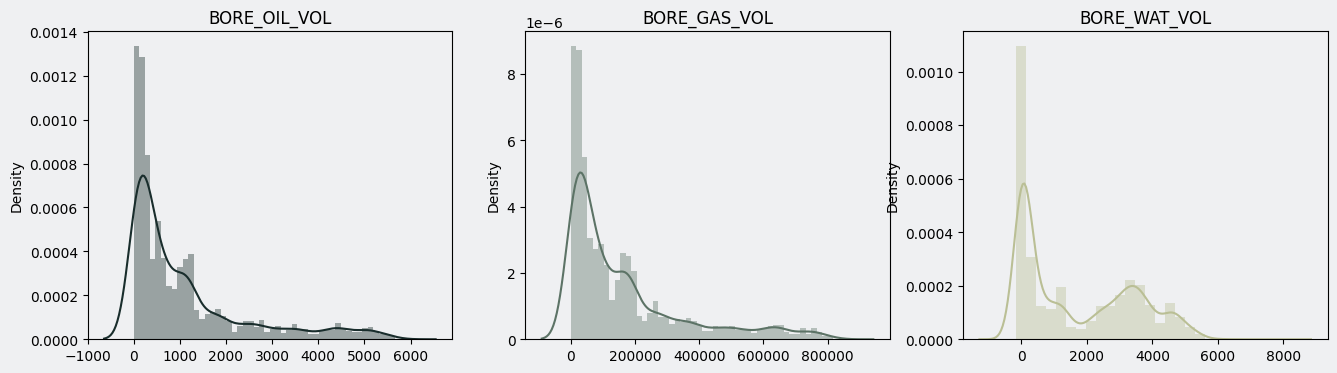

In [ ]:
# Create Figure And Axis
f, axes = plt.subplots(1, 3, figsize=(16, 4), facecolor='#EFF0F2')

# Create Distribution-Plot For The Volume Of Oil Produced
sns.distplot(x=Production['BORE_OIL_VOL'], color="#192D2C", ax=axes[0])
axes[0].set_title('BORE_OIL_VOL')
axes[0].set_facecolor('#EFF0F2')

# Create Distribution-Plot For The Volume Of Gas Produced
sns.distplot(x=Production['BORE_GAS_VOL'], color="#5C7366", ax=axes[1])
axes[1].set_title('BORE_GAS_VOL')
axes[1].set_facecolor('#EFF0F2')

# Create Distribution-Plot For The Volume Of Water Produced
sns.distplot(x=Production['BORE_WAT_VOL'], color="#BABF95", ax=axes[2])
axes[2].set_title('BORE_WAT_VOL')
axes[2].set_facecolor('#EFF0F2')

***The distribution-plot reveals a notable frequency of wells yielding zero oil, gas, and water production output.***

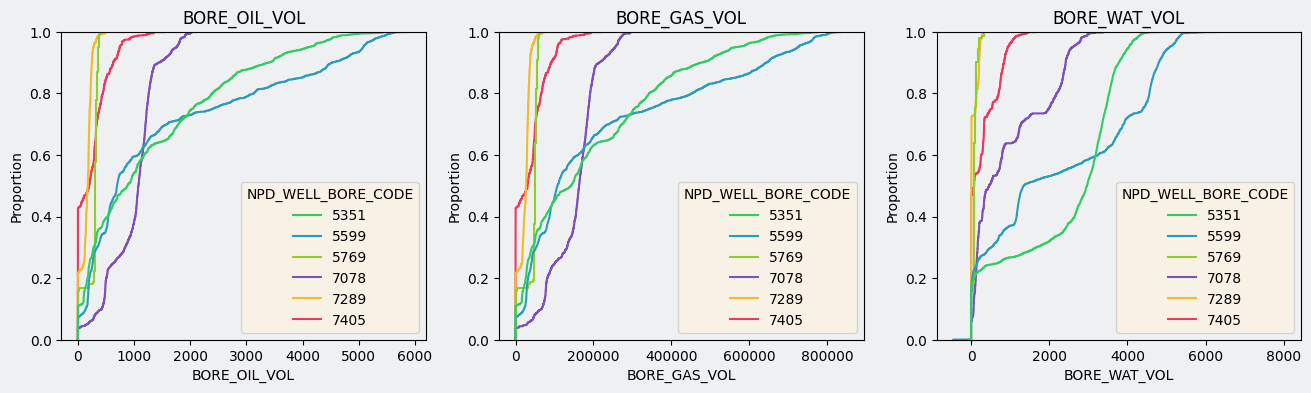

In [ ]:
# Create Figure And Axis
f, axes = plt.subplots(1, 3, figsize=(16, 4), facecolor='#EFF0F2')

# Create Empirical Cumulative Distribution Functions-Plot For The Volume Of Oil Produced
sns.ecdfplot(x='BORE_OIL_VOL',data=Production, hue='NPD_WELL_BORE_CODE',
             palette=['#31CC65', '#299DBA', '#91CF27', '#7D51B5', '#F2BA2C', '#ED3960'], ax=axes[0])
axes[0].set_facecolor('#EFF0F2')
axes[0].set_title('BORE_OIL_VOL')
axes[0].get_legend().set_frame_on(True)
axes[0].get_legend().get_frame().set_facecolor('#FBF3E4')

# Create Empirical Cumulative Distribution Functions-Plot For The Volume Of Gas Produced
sns.ecdfplot(x='BORE_GAS_VOL',data=Production, hue='NPD_WELL_BORE_CODE',
             palette=['#31CC65', '#299DBA', '#91CF27', '#7D51B5', '#F2BA2C', '#ED3960'], ax=axes[1])
axes[1].set_facecolor('#EFF0F2')
axes[1].set_title('BORE_GAS_VOL')
axes[1].get_legend().set_frame_on(True)
axes[1].get_legend().get_frame().set_facecolor('#FBF3E4')

# Create Empirical Cumulative Distribution Functions-Plot For The Volume Of Water Produced
sns.ecdfplot(x='BORE_WAT_VOL',data=Production, hue='NPD_WELL_BORE_CODE',
             palette=['#31CC65', '#299DBA', '#91CF27', '#7D51B5', '#F2BA2C', '#ED3960'], ax=axes[2])
axes[2].set_facecolor('#EFF0F2')
axes[2].set_title('BORE_WAT_VOL')
axes[2].get_legend().set_frame_on(True)
axes[2].get_legend().get_frame().set_facecolor('#FBF3E4')

***The ECDF-plot indicates that Well #7405 has the highest proportion of production wells with zero oil and gas production, accounting for up to 40%. Well #7289 and Well #5769 follow closely, each representing 18-22% of instances with no production.***

### **Multivariate Data Analysis**

---

In [ ]:
# Remove 'BORE_OIL_VOL' Equal 0
Production = Production[Production['BORE_OIL_VOL'] != 0]

# Remove 'BORE_OIL_VOL' Equal 0
Production = Production[Production['BORE_GAS_VOL'] != 0]

# Remove 'BORE_OIL_VOL' Equal 0
Production = Production[Production['BORE_WAT_VOL'] != 0]

# Remove 'BORE_OIL_VOL' Equal 0
Production['NPD_WELL_BORE_CODE'] = Production['NPD_WELL_BORE_CODE'].astype('str')

#### ***Oil Production Data***

---

In [ ]:
# Create Scatter-Plot For The Volume Of Oil Produced
fig = px.scatter(Production, x="DATEPRD", y="BORE_OIL_VOL", color="NPD_WELL_BORE_CODE", symbol="NPD_WELL_BORE_CODE",
                 labels={"NPD_WELL_BORE_CODE": "Wellbore Code", "DATEPRD": "Date", "BORE_OIL_VOL": "Oil Volume"},
                 title="Time-Based Oil Production Data", custom_data=["NPD_WELL_BORE_CODE"])

# Set Up The Plot
fig.update_layout(font_color="black", font_size=12, title_font_size=20, title_font_color="black", paper_bgcolor="#EFF0F2",
                  plot_bgcolor="#192D2C", legend_title_text="Wellbore Code", xaxis_title="Date", yaxis_title="Oil Volume")

fig.show()

***The scatter-plot analysis reveals that Well #5599 and Well #5351 exhibit characteristics indicative of wells with the most substantial oil production throughout the specified year.***

In [ ]:
# Create Scatter-Plot For The Volume Of Oil Produced In Each Wells
fig = px.scatter(Production, x="DATEPRD", y="BORE_OIL_VOL", color="NPD_WELL_BORE_CODE", symbol="NPD_WELL_BORE_CODE",
                 labels={"NPD_WELL_BORE_CODE": "Wellbore Code", "DATEPRD": "Date", "BORE_OIL_VOL": "Oil Volume"},
                 title="Time-Based Oil Production Data In Each Wells", custom_data=["NPD_WELL_BORE_CODE"],
                 hover_data=['DATEPRD', 'BORE_OIL_VOL', 'NPD_WELL_BORE_CODE'],
                 facet_col="NPD_WELL_BORE_CODE",
                 facet_col_wrap=3)

# Set Up The Plot
fig.update_layout(font_color="black", font_size=12, title_font_size=20, title_font_color="black",
                  paper_bgcolor="#EFF0F2", plot_bgcolor="#192D2C", legend_title_text="Wellbore Code",
                  xaxis_title="Date", yaxis_title="Oil Volume", showlegend=False)

fig.show()

#### **Gas Production Data**

---

In [ ]:
# Create Scatter-Plot For The Volume Of Gas Produced
fig = px.scatter(Production, x="DATEPRD", y="BORE_GAS_VOL", color="NPD_WELL_BORE_CODE", symbol="NPD_WELL_BORE_CODE",
                 labels={"NPD_WELL_BORE_CODE": "Wellbore Code", "DATEPRD": "Date", "BORE_GAS_VOL": "Gas Volume"},
                 title="Time-Based Gas Production Data", custom_data=["NPD_WELL_BORE_CODE"])

# Set Up The Plot
fig.update_layout(font_color="black", font_size=12, title_font_size=20, title_font_color="black", paper_bgcolor="#EFF0F2",
                  plot_bgcolor="#192D2C", legend_title_text="Wellbore Code", xaxis_title="Date", yaxis_title="Gas Volume")

fig.show()

***The scatter-plot analysis reveals that Well #5599 and Well #5351 exhibit characteristics indicative of wells with the most substantial gas production throughout the specified year.***

In [ ]:
# Create Scatter-Plot For The Volume Of Gas Produced In Each Wells
fig = px.scatter(Production, x="DATEPRD", y="BORE_GAS_VOL", color="NPD_WELL_BORE_CODE", symbol="NPD_WELL_BORE_CODE",
                 labels={"NPD_WELL_BORE_CODE": "Wellbore Code", "DATEPRD": "Date", "BORE_GAS_VOL": "Gas Volume"},
                 title="Time-Based Gas Production Data In Each Wells", custom_data=["NPD_WELL_BORE_CODE"],
                 hover_data=['DATEPRD', 'BORE_GAS_VOL', 'NPD_WELL_BORE_CODE'],
                 facet_col="NPD_WELL_BORE_CODE",
                 facet_col_wrap=3)

# Set Up The Plot
fig.update_layout(font_color="black", font_size=12, title_font_size=20, title_font_color="black",
                  paper_bgcolor="#EFF0F2", plot_bgcolor="#192D2C", legend_title_text="Wellbore Code",
                  xaxis_title="Date", yaxis_title="Gas Volume", showlegend=False)

fig.show()

#### ***Water Production Data***

---

In [ ]:
# Create Scatter-Plot For The Volume Of Water Produced
fig = px.scatter(Production, x="DATEPRD", y="BORE_WAT_VOL", color="NPD_WELL_BORE_CODE", symbol="NPD_WELL_BORE_CODE",
                 labels={"NPD_WELL_BORE_CODE": "Wellbore Code", "DATEPRD": "Date", "BORE_WAT_VOL": "Water Volume"},
                 title="Time-Based Water Production Data", custom_data=["NPD_WELL_BORE_CODE"])

# Set Up The Plot
fig.update_layout(font_color="black", font_size=12, title_font_size=20, title_font_color="black", paper_bgcolor="#EFF0F2",
                  plot_bgcolor="#192D2C", legend_title_text="Wellbore Code", xaxis_title="Date", yaxis_title="Water Volume")

fig.show()

***The scatter-plot analysis reveals that Well #5599 and Well #5351 exhibit characteristics indicative of wells with the most substantial water production throughout the specified year.***

In [ ]:
# Create Scatter-Plot For The Volume Of Water Produced In Each Wells
fig = px.scatter(Production, x="DATEPRD", y="BORE_WAT_VOL", color="NPD_WELL_BORE_CODE", symbol="NPD_WELL_BORE_CODE",
                 labels={"NPD_WELL_BORE_CODE": "Wellbore Code", "DATEPRD": "Date", "BORE_WAT_VOL": "Water Volume"},
                 title="Time-Based Water Production Data In Each Wells", custom_data=["NPD_WELL_BORE_CODE"],
                 hover_data=['DATEPRD', 'BORE_WAT_VOL', 'NPD_WELL_BORE_CODE'],
                 facet_col="NPD_WELL_BORE_CODE",
                 facet_col_wrap=3)

# Set Up The Plot
fig.update_layout(font_color="black", font_size=12, title_font_size=20, title_font_color="black",
                  paper_bgcolor="#EFF0F2", plot_bgcolor="#192D2C", legend_title_text="Wellbore Code",
                  xaxis_title="Date", yaxis_title="Water Volume", showlegend=False)

fig.show()

# **Conclusion**

*   Six out of the seven wells were identified as oil producers (OP) and retained in the dataset.
*   The box plot reveals the presence of outliers in oil production exceeding approximately 3,000 units and gas production surpassing 460,000 units.
*   The distribution-plot reveals a notable frequency of wells yielding zero oil, gas, and water production output.
*   The ECDF plot highlights Well #7405 as having the highest proportion of instances with zero oil and gas production at 40%, with Well #7289 and Well #5769 closely following at 18-22% each.
*   The scatter-plot analysis reveals that Well #5599 and Well #5351 exhibit characteristics indicative of wells with the most substantial oil and gas production throughout the specified year.